In [1]:
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/techsash/waste-classification-data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  surabhitadvalkar


Your Kaggle Key:

  ································


100%|██████████| 427M/427M [02:02<00:00, 3.66MB/s] 


In [4]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import os
%matplotlib inline
np.random.seed(1)

In [5]:
os.getcwd()

'C:\\Users\\surab\\Rose_Hack_2023'

In [6]:
# data_dir = "TRAIN"
# os.listdir(os.path.join(data_dir, "O"))
# Step 1: Load Dataset
dataset = tf.keras.utils.image_dataset_from_directory("waste-classification-data/DATASET/TRAIN")

Found 22564 files belonging to 2 classes.


Preprocessing Data


In [7]:
# Step 2 Scale the dataset
dataset = dataset.map(lambda x,y: (x/255, y))
# Allows for data to be processed while it is being processed (While it is in the pipeline). Speeds up how fast we can access data from out disk.

In [8]:
print(len(dataset))
training_size = int(len(dataset)*.7)
validation_size = int(len(dataset)*.2)
testing_size = int(len(dataset)*.1) + 1

706


In [9]:
training = dataset.take(training_size)
validation = dataset.skip(training_size).take(validation_size)
testing = dataset.skip(training_size + validation_size).take(testing_size)

In [10]:
# Get another batch from the iterator
# batch = scaled_iterator.next()

In [11]:
# fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
# for index, image in enumerate(batch[0][:4]):
#     ax[index].imshow(image)
#     ax[index].title.set_text(batch[1][index])

# Class 0: Organic Waste
# Class 1: Recyclable Waste

In [12]:
# Images represented as numpy arrays
# batch[0].max()

In [13]:
model = Sequential()

In [14]:
model.add(Conv2D(filters = 16, kernel_size=(3,3), strides = (1,1), activation = 'relu', input_shape= (256, 256, 3), padding = 'same'))
model.add(MaxPooling2D())

model.add(Conv2D(filters = 32, kernel_size=(3,3), strides = (1,1), activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters = 64, kernel_size=(3,3), strides = (1,1), activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [16]:
logDirectory = 'LOGS'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= logDirectory)

In [17]:
history = model.fit(training, epochs=10, validation_data=validation, callbacks=[tensorboard_callback])

Epoch 1/10
494/494 [==============================] - 626s 1s/step - loss: 0.4364 - accuracy: 0.8101 - val_loss: 0.4344 - val_accuracy: 0.7981
Epoch 2/10
494/494 [==============================] - 598s 1s/step - loss: 0.3632 - accuracy: 0.8460 - val_loss: 0.3662 - val_accuracy: 0.8380
Epoch 3/10
494/494 [==============================] - 798s 2s/step - loss: 0.3201 - accuracy: 0.8665 - val_loss: 0.3662 - val_accuracy: 0.8488
Epoch 4/10
494/494 [==============================] - 576s 1s/step - loss: 0.2705 - accuracy: 0.8913 - val_loss: 0.3951 - val_accuracy: 0.8422
Epoch 5/10
494/494 [==============================] - 583s 1s/step - loss: 0.1972 - accuracy: 0.9238 - val_loss: 0.4018 - val_accuracy: 0.8500
Epoch 6/10
494/494 [==============================] - 534s 1s/step - loss: 0.1298 - accuracy: 0.9536 - val_loss: 0.4982 - val_accuracy: 0.8402
Epoch 7/10
494/494 [==============================] - 516s 1s/step - loss: 0.0946 - accuracy: 0.9657 - val_loss: 0.5824 - val_accuracy: 0.8515

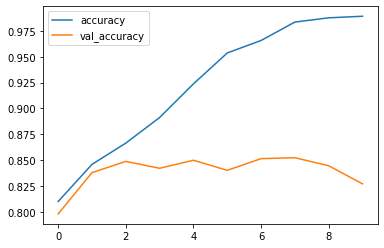

In [19]:
fig, ax = plt.subplots()
ax.plot(history.history['accuracy'], label = 'accuracy')
ax.plot(history.history['val_accuracy'], label = 'val_accuracy')
leg = ax.legend();

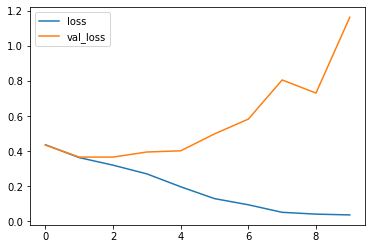

In [20]:
fig, ax = plt.subplots()
ax.plot(history.history['loss'], label = 'loss')
ax.plot(history.history['val_loss'], label = 'val_loss')
leg = ax.legend();